# A2 Measurement of liquid surface tension coefficient by pulling-escape method
by H cyan

huangzw29@mail2.sysu.edu.cn

2021.5.27

In [1]:
import pandas as pd
import numpy as np
import sympy as sp

import matplotlib.pyplot as plt
from matplotlib import ticker

from scipy import stats
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

## EXP1 Calibration of the force sensor

In [2]:
df1 = pd.read_csv('A2 data\Calibration.csv')
df1['U'] = (df1['U1']+df1['U2'])/2
df1

,m,U1,U2,U
0,0.0,0.0,-0.4,-0.20
1,0.5,6.1,5.6,5.85
2,1.0,11.9,11.5,11.70
3,1.5,18.0,17.8,17.90
4,2.0,23.9,22.6,23.25
5,2.5,30.0,29.3,29.65
6,3.0,35.9,35.3,35.60
7,3.5,42.0,42.0,42.00


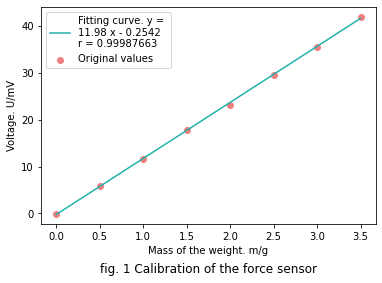

In [3]:
plt.scatter(df1['m'], df1['U'], color='lightcoral', label='Original values')

U_m = np.polyfit(df1['m'], df1['U'], 1)
U_reg = np.polyval(U_m, df1['m'])
r = np.corrcoef(df1['m'], df1['U'])[0,1]

plt.plot(df1['m'], U_reg, color='lightseagreen', label='Fitting curve. y ={}\nr = {:.8f}'.format(np.poly1d(U_m), r))

plt.legend()
plt.xlabel('Mass of the weight. m/g')
plt.ylabel('Voltage. U/mV')
plt.title('fig. 1 Calibration of the force sensor', y=-0.25)
plt.savefig(r'A2 output\fig. 1.png', bbox_inches = 'tight', dpi=300)

In [4]:
g = 9.7883
k = U_m[0]/g
print('Sensitivity of the force sensor: {}'.format(k))

Sensitivity of the force sensor: 1.2243723434635034


## EXP2 size of the metal ring

In [5]:
df2 = pd.read_csv('A2 data\D.csv')
print(df2)
print(df2.describe())
D1, D2 = tuple(df2.describe().loc['mean'])
SD1, SD2 = tuple(df2.describe().loc['std'])
print(D1, D2)

      D1     D2
0  34.92  32.94
1  34.96  32.96
2  34.94  32.96
3  34.94  32.98
4  34.92  32.94
              D1         D2
count   5.000000   5.000000
mean   34.936000  32.956000
std     0.016733   0.016733
min    34.920000  32.940000
25%    34.920000  32.940000
50%    34.940000  32.960000
75%    34.940000  32.960000
max    34.960000  32.980000
34.936 32.956


## EXP3 measure the liquid surface tension coefficient of water

In [6]:
df3 = pd.read_csv('A2 data\water.csv')
df3['dU'] = df3['U1']-df3['U2']
print(df3)
print(df3['dU'].describe())
dU = df3['dU'].describe()['mean']
SdU = df3['dU'].describe()['std']

     U1   U2    dU
0  22.3 -0.1  22.4
1  22.4  0.0  22.4
2  22.7  0.1  22.6
3  22.5  0.0  22.5
4  22.6  0.0  22.6
count     5.0
mean     22.5
std       0.1
min      22.4
25%      22.4
50%      22.5
75%      22.6
max      22.6
Name: dU, dtype: float64


In [7]:
a_w = dU/(k*np.pi*(D1+D2))
print('liquid surface tension coefficient of water = {}'.format(a_w))

liquid surface tension coefficient of water = 0.08615897661393329


In [8]:
dUs, D1s, D2s = sp.symbols('dUs D1s D2s')
a_ws = dUs/(k*np.pi*(D1s+D2s))
subs = {'dUs':dU, 'D1s':D1, 'D2s':D2}
a_u, a_d1, a_d2 = tuple(sp.diff(a_ws, i).evalf(subs = subs) for i in ['dUs', 'D1s', 'D2s'])

In [9]:
Sa = ( (a_u*SdU)**2 + (a_d1*SD1)**2 + (a_d2*SD2)**2 )**(1/2)
ud = 0.02/(3**(1/2))
uu = 0.1/(3**(1/2))
Sb = ( (a_u*uu)**2 + (a_d1*ud)**2 + (a_d2*ud)**2 )**(1/2)
S = ( (Sa)**2 + (Sb)**2 )**(1/2)

print('Sa = {}\nSb = {}\nS = {}'.format(Sa, Sb, S))

Sa = 0.000384104596226855
Sb = 0.000222053194548625
S = 0.000443671006548597


In [10]:
va = 5-1
vb = 1
Va = Sa**4/( (a_u*SdU)**4/va + (a_d1*SD1)**4/va + (a_d2*SD2)**4/va )
Vb = Sb**4/( (a_u*uu)**4/vb + (a_d1*ud)**4/vb + (a_d2*ud)**4/vb )
V = (S**4) / ( (Sa)**4/Va + (Sb)**4/Vb )
print('Va = {}\nVb = {}\nV = {}'.format(Va, Vb, V))

Va = 4.04927934288868
Vb = 1.01761099888906
V = 4.99022863767200


## EXP4 measure the liquid surface tension coefficients of alcohol solutions of different concentrations

### 4-1 Fitting

In [11]:
df4 = pd.read_csv('A2 data\Alcohol.csv')
df4['dU'] = df4['U1'] - df4['U2']
df4['a'] = df4['dU']/(k*np.pi*(D1+D2))
df4 = df4.append([{'C':0, 'a':a_w }])
df4.sort_values(by=['C'], inplace=True)

df4.reset_index(drop=True, inplace=True)
df4

,C,U1,U2,dU,a
0,0.0,NaN,NaN,NaN,0.086159
1,0.1,15.9,0.0,15.9,0.060886
2,0.2,13.7,0.1,13.6,0.052078
3,0.4,10.8,0.0,10.8,0.041356
4,0.6,9.6,0.0,9.6,0.036761
5,0.8,8.8,-0.1,8.9,0.034081
6,1.0,7.8,0.1,7.7,0.029486


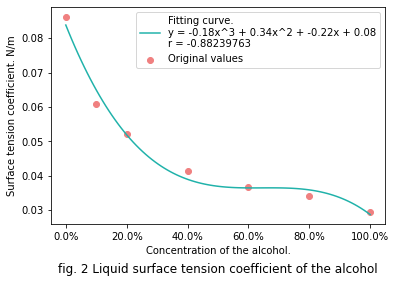

In [12]:
plt.scatter(df4['C'], df4['a'], color='lightcoral', label='Original values')

a_c = np.polyfit(df4['C'], df4['a'], 3)
c_smooth = np.linspace(0, 1, 100)
U_reg = np.polyval(a_c, c_smooth)
r = np.corrcoef(df4['C'], df4['a'])[0,1]
A1, A2, A3, A4 = tuple(a_c)
plt.plot(c_smooth, U_reg, color='lightseagreen', 
                          label='Fitting curve. \ny = {:.2f}x^3 + {:.2f}x^2 + {:.2f}x + {:.2f}\nr = {:.8f}'
                          .format(A1, A2, A3, A4, r))

plt.legend()
plt.gca().xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
plt.xlabel('Concentration of the alcohol.')
plt.ylabel('Surface tension coefficient. N/m')
plt.title('fig. 2 Liquid surface tension coefficient of the alcohol', y=-0.25)
plt.savefig(r'A2 output\fig. 2.png', bbox_inches = 'tight', dpi=300)

### 4-2 Influential points detection

In [13]:
x = df4['C']
y = df4['a']
X = np.column_stack((x, x**2, x**3))
X = sm.add_constant(X)
fit = sm.OLS(y, X).fit()

print(fit.summary())
pred = fit.predict()
print("RMSE : ", np.sqrt(mean_squared_error(y, pred))) 


                            OLS Regression Results                            
Dep. Variable:                      a   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     72.72
Date:                Fri, 28 May 2021   Prob (F-statistic):            0.00267
Time:                        22:02:37   Log-Likelihood:                 33.127
No. Observations:                   7   AIC:                            -58.25
Df Residuals:                       3   BIC:                            -58.47
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0838      0.003     28.368      0.0

Text(0.5, -0.25, 'fig.2_1 Liquid surface tension coefficient of the alcohol')

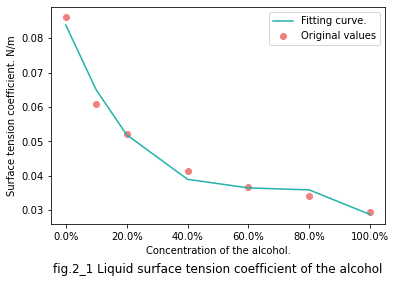

In [14]:
plt.scatter(x, y, color='lightcoral', label='Original values')
plt.plot(x, pred, color='lightseagreen', label='Fitting curve.')

plt.legend()
plt.gca().xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
plt.xlabel('Concentration of the alcohol.')
plt.ylabel('Surface tension coefficient. N/m')
plt.title('fig.2_1 Liquid surface tension coefficient of the alcohol', y=-0.25)                      

In [15]:
out_points = fit.get_influence()

#### QQ-plot

[ 1.56411586e+02 -2.64877214e+00  5.48544480e-02  9.44595197e-01
  9.23700109e-02 -8.00257901e-01  1.12947086e+00]
0    0.0
1    0.1
Name: C, dtype: float64


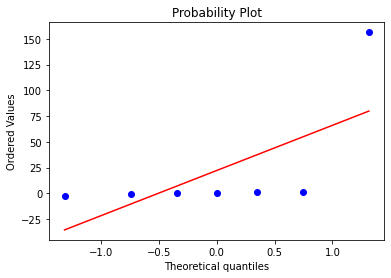

In [16]:
studentized_residual = out_points.resid_studentized_external
print(studentized_residual)

studentized_residual_out = x[(np.abs(studentized_residual) > 2)]
print(studentized_residual_out)

stats.probplot(studentized_residual, dist='norm', plot=plt)
plt.savefig(r'A2 output\qqplot1.png', bbox_inches = 'tight', dpi=300)

((array([-1.23132171, -0.63003387, -0.19819716,  0.19819716,  0.63003387,
          1.23132171]),
  array([-2.64877214, -0.8002579 ,  0.05485445,  0.09237001,  0.9445952 ,
          1.12947086])),
 (1.4748641922638706, -0.2046232541370794, 0.9413691932541923))

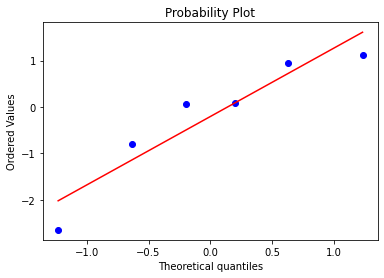

In [17]:
stats.probplot(studentized_residual[1:], dist='norm', plot=plt)

#### DFFITS

[ 3.38090904e+02 -1.86306743e+00  4.87167101e-02  8.14900379e-01
  8.50692140e-02 -9.06838595e-01  5.30039347e+00]
0    0.0
6    1.0
Name: C, dtype: float64


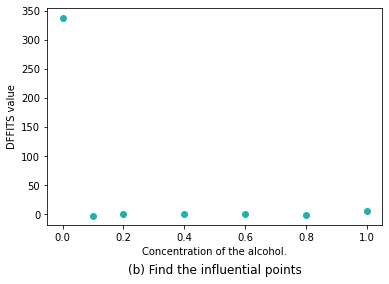

In [18]:
dffits = out_points.dffits[0]
print(dffits)
dffits_out = x[dffits > 2 * np.sqrt((X.shape[1] + 1) / X.shape[0])]
print(dffits_out)

plt.scatter(x, dffits, color='lightseagreen')
plt.xlabel('Concentration of the alcohol.')
plt.ylabel('DFFITS value')
plt.title('(b) Find the influential points', y=-0.25)
plt.savefig(r'A2 output\DFFITS1.png', bbox_inches = 'tight', dpi=300)

#### cook's distance

[3.50392577e+00 2.88738573e-01 8.88657203e-04 1.72199925e-01
 2.70226105e-03 2.33587415e-01 6.43239608e+00]


Text(0.5, -0.25, '(c) Find the influential points')

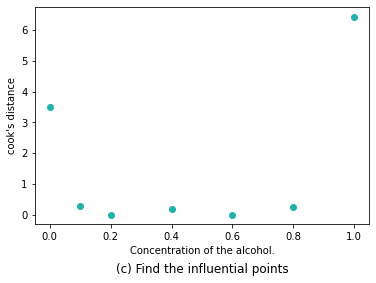

In [19]:
cook = out_points.cooks_distance[0]
print(cook)
plt.scatter(x, cook, color='lightseagreen')
plt.xlabel('Concentration of the alcohol.')
plt.ylabel('cook\'s distance')
plt.title('(c) Find the influential points', y=-0.25)

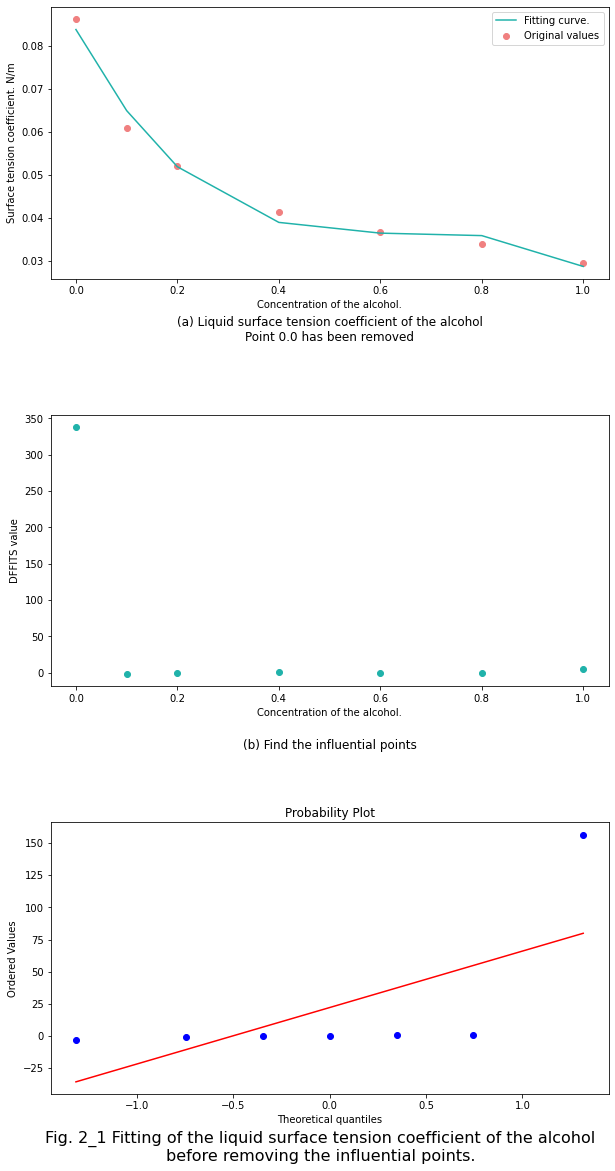

In [20]:
fig, a =  plt.subplots(3, 1, figsize=(10, 20))

a[0].scatter(x, y, color='lightcoral', label='Original values')
a[0].plot(x, pred, color='lightseagreen', label='Fitting curve.')
a[0].legend()
a[0].set_xlabel('Concentration of the alcohol.')
a[0].set_ylabel('Surface tension coefficient. N/m')
a[0].set_title('(a) Liquid surface tension coefficient of the alcohol\nPoint 0.0 has been removed', y=-0.25)

a[1].scatter(x, dffits, color='lightseagreen')
a[1].set_xlabel('Concentration of the alcohol.')
a[1].set_ylabel('DFFITS value')
a[1].set_title('(b) Find the influential points', y=-0.25)

stats.probplot(studentized_residual, dist='norm', plot=plt)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
plt.suptitle('Fig. 2_1 Fitting of the liquid surface tension coefficient of the alcohol\nbefore removing the influential points.', y=0.1, fontsize=16)
plt.savefig(r'A2 output\fig. 2_1.png', bbox_inches = 'tight', dpi=300)

### 4-3 remove the influential points

In [21]:
df4_2 = df4.drop(index=0)
df4_2.reset_index(drop=True, inplace=True)
df4_2

,C,U1,U2,dU,a
0,0.1,15.9,0.0,15.9,0.060886
1,0.2,13.7,0.1,13.6,0.052078
2,0.4,10.8,0.0,10.8,0.041356
3,0.6,9.6,0.0,9.6,0.036761
4,0.8,8.8,-0.1,8.9,0.034081
5,1.0,7.8,0.1,7.7,0.029486


In [22]:
x = df4_2['C']
y = df4_2['a']
X = np.column_stack((x, x**2, x**3))
X = sm.add_constant(X)
fit = sm.OLS(y, X).fit()

print(fit.summary())

pred = fit.predict()
print("RMSE : ", np.sqrt(mean_squared_error(y, pred))) 

                            OLS Regression Results                            
Dep. Variable:                      a   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.807e+05
Date:                Fri, 28 May 2021   Prob (F-statistic):           5.53e-06
Time:                        22:02:45   Log-Likelihood:                 56.168
No. Observations:                   6   AIC:                            -104.3
Df Residuals:                       2   BIC:                            -105.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0727   7.79e-05    933.697      0.0

Text(0.5, -0.25, 'fig.2_2 Liquid surface tension coefficient of the alcohol')

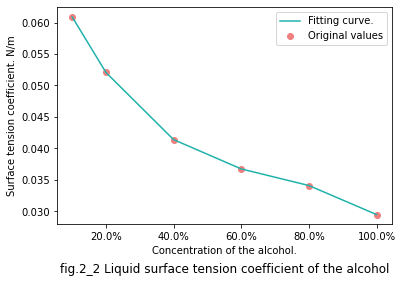

In [23]:
plt.scatter(x, y, color='lightcoral', label='Original values')
plt.plot(x, pred, color='lightseagreen', label='Fitting curve.')
plt.legend()
plt.gca().xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
plt.xlabel('Concentration of the alcohol.')
plt.ylabel('Surface tension coefficient. N/m')
plt.title('fig.2_2 Liquid surface tension coefficient of the alcohol', y=-0.25)

In [24]:
out_points = fit.get_influence()

#### QQ-plot

[-0.48990858  0.70815188 -3.98180138  1.25603781 -0.5728414   0.38306462]
2    0.4
Name: C, dtype: float64


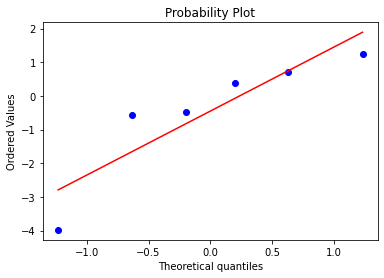

In [25]:
studentized_residual = out_points.resid_studentized_external
print(studentized_residual)

studentized_residual_out = x[(np.abs(studentized_residual) > 2)]
print(studentized_residual_out)

stats.probplot(studentized_residual, dist='norm', plot=plt)
plt.savefig(r'A2 output\qqplot2.png', bbox_inches = 'tight', dpi=300)

#### DFFITS

[-1.16352713  0.62971835 -4.96117369  1.16102576 -0.81018645  2.31478336]
5    1.0
Name: C, dtype: float64


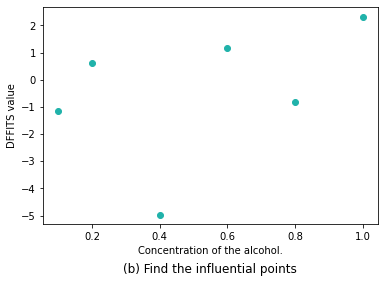

In [26]:
dffits = out_points.dffits[0]
print(dffits)
dffits_out = x[dffits > 2 * np.sqrt((X.shape[1] + 1) / X.shape[0])]
print(dffits_out)
plt.scatter(x, dffits, color='lightseagreen')
plt.xlabel('Concentration of the alcohol.')
plt.ylabel('DFFITS value')
plt.title('(b) Find the influential points', y=-0.25)
plt.savefig(r'A2 output\DFFITS2.png', bbox_inches = 'tight', dpi=300)

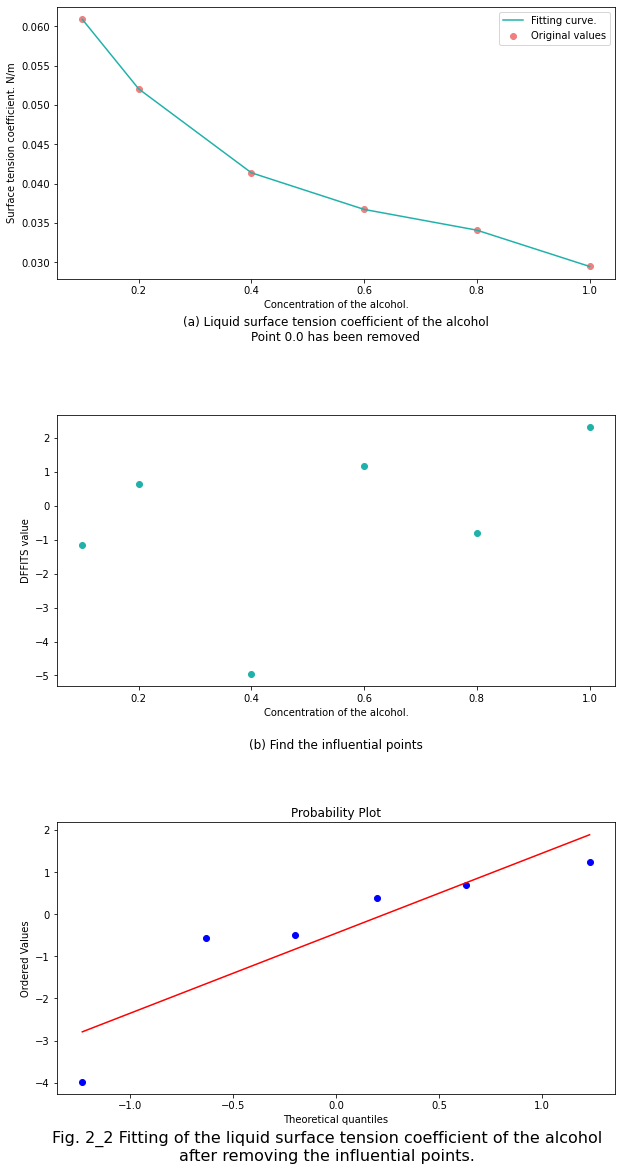

In [27]:
fig, a =  plt.subplots(3,1,figsize=(10, 20))

a[0].scatter(x, y, color='lightcoral', label='Original values')
a[0].plot(x, pred, color='lightseagreen', label='Fitting curve.')
a[0].legend()
a[0].set_xlabel('Concentration of the alcohol.')
a[0].set_ylabel('Surface tension coefficient. N/m')
a[0].set_title('(a) Liquid surface tension coefficient of the alcohol\nPoint 0.0 has been removed', y=-0.25)

a[1].scatter(x, dffits, color='lightseagreen')
a[1].set_xlabel('Concentration of the alcohol.')
a[1].set_ylabel('DFFITS value')
a[1].set_title('(b) Find the influential points', y=-0.25)

stats.probplot(studentized_residual, dist='norm', plot=plt)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
plt.suptitle('Fig. 2_2 Fitting of the liquid surface tension coefficient of the alcohol\nafter removing the influential points.', y=0.1, fontsize=16)
plt.savefig(r'A2 output\fig. 2_2.png', bbox_inches = 'tight', dpi=300)

### 4-4 Predict the tension coefficent of water with the regression model

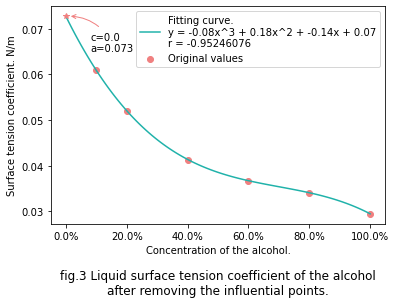

In [30]:
plt.scatter(df4_2['C'], df4_2['a'], color='lightcoral', label='Original values')

a_c = np.polyfit(df4_2['C'], df4_2['a'], 3)
c_smooth = np.linspace(0, 1, 100)
U_reg = np.polyval(a_c, c_smooth)
r = np.corrcoef(df4_2['C'], df4_2['a'])[0,1]
A1, A2, A3, A4 = tuple(a_c)
plt.plot(c_smooth, U_reg, color='lightseagreen', 
                          label='Fitting curve. \ny = {:.2f}x^3 + {:.2f}x^2 + {:.2f}x + {:.2f}\nr = {:.8f}'
                          .format(A1, A2, A3, A4, r))

plt.legend()
plt.gca().xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
plt.xlabel('Concentration of the alcohol.')
plt.ylabel('Surface tension coefficient. N/m')
plt.title('fig.3 Liquid surface tension coefficient of the alcohol\nafter removing the influential points.', y=-0.35)
plt.plot(0, np.polyval(a_c, 0), '*', color='lightcoral')
plt.annotate(text='c=0.0\na={:.2g}'.format(np.polyval(a_c, 0)) , xy=(0, np.polyval(a_c, 0)), xytext=(0.08, 0.065), arrowprops=dict(arrowstyle='->',
                 color='lightcoral',
                 shrinkA = 5,
                 shrinkB = 5,
                 connectionstyle="arc3,rad=0.3"))
plt.savefig(r'A2 output\fig. 3.png', bbox_inches = 'tight', dpi=300)